In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None) 
import warnings
warnings.filterwarnings('ignore')

In [83]:
df=pd.read_csv("Datasets-main/auto-mpg.csv")
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [84]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [85]:
df=df.drop(['car name'],axis=1)

In [86]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [87]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [88]:
duplicate=df.duplicated()
print(duplicate.sum())

0


<AxesSubplot:xlabel='origin'>

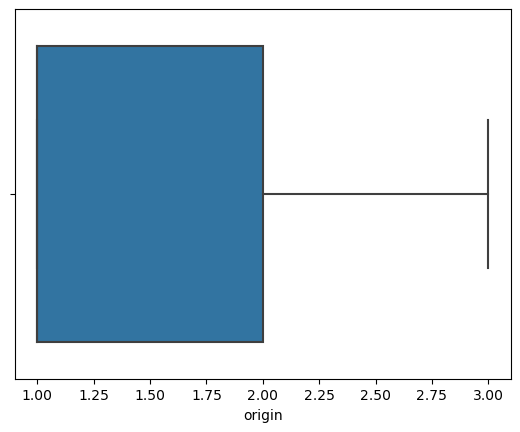

In [89]:
sns.boxplot(x="origin", data=df)

In [90]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range= Q1 - (1.5 * IQR)
    upper_range= Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [91]:
lowerValue,upperValue=remove_outlier(df['mpg'])
df['mpg']=np.where(df['mpg']>upperValue,upperValue,df['mpg'])
df['mpg']=np.where(df['mpg']<lowerValue,lowerValue,df['mpg'])

<AxesSubplot:xlabel='mpg'>

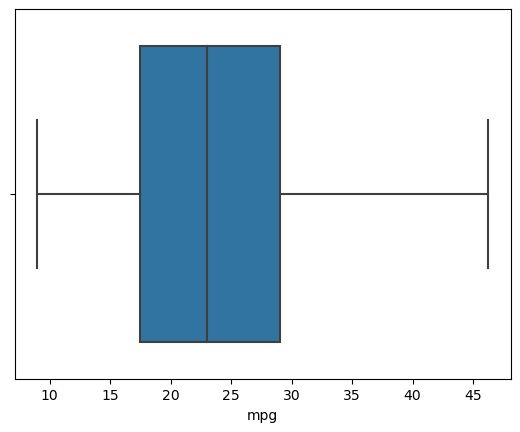

In [92]:
sns.boxplot(x="mpg", data=df)

In [93]:
lowerValue,upperValue=remove_outlier(df['acceleration'])
df['acceleration']=np.where(df['acceleration']>upperValue,upperValue,df['acceleration'])
df['acceleration']=np.where(df['acceleration']<lowerValue,lowerValue,df['acceleration'])

<AxesSubplot:xlabel='acceleration'>

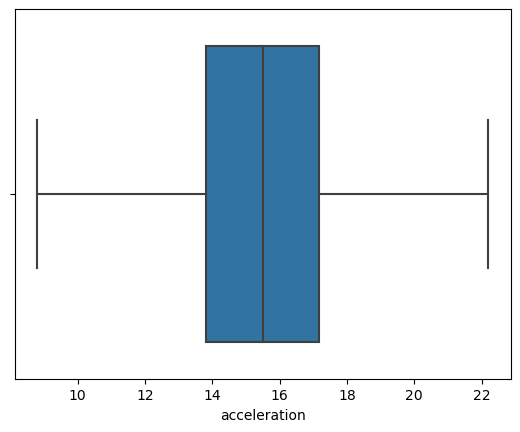

In [94]:
sns.boxplot(x="acceleration", data=df)

In [95]:
mapping = {1: 'America', 2: 'Europe', 3: 'Asia'}
df['origin'] = df['origin'].replace(mapping)

In [96]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,America
1,15.0,8,350.0,165,3693,11.5,70,America
2,18.0,8,318.0,150,3436,11.0,70,America
3,16.0,8,304.0,150,3433,12.0,70,America
4,17.0,8,302.0,140,3449,10.5,70,America


In [97]:
df['horsepower']=df['horsepower'].replace(to_replace='?', value=np.nan)

In [98]:
df['horsepower']=df['horsepower'].astype(float)

In [99]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [100]:
median1=df['horsepower'].median()
median1

93.5

In [101]:
df['horsepower']=df['horsepower'].replace(np.nan,median1)

In [102]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [116]:
Y=df[['mpg']]
X=df.drop(['mpg','origin'],axis=1)

In [117]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

model_lr=LinearRegression()

In [118]:
model_lr.fit(X_train,Y_train)

LinearRegression()

In [119]:
model_lr.score(X_train,Y_train)

0.8000331153829165

In [120]:
model_lr.score(X_test,Y_test)

0.8258160557841575

In [ ]:
#how to check which one is dependent column
#how to check whether column is mean median mode